# **Titanic Competition**

## **Informazioni**

**Informazioni Generali sul dataset**:

- `Survived` (`0`, `1`): Sopravvivenza (1 se la persona è sopravvissuta, 0 altrimenti);
- `Pclass` (`1`, `2`, `3`): Classe di alloggio (1°, 2° o 3° classe);
- `Sex` (`'male'`, `'female'`): Genere della persona;
- `Age`: Età (*in anni*) della persona;
- `SibSp`: Numero di fratelli oppure se sposa/marito a bordo;
- `Parch`: Numero di genitori e/o figli a bordo;
- `Ticket`: Numero identificativo del biglietto;
- `Fare`: Prezzo del biglietto;
- `Cabin`: Numero di cabina;
- `Embarked` (`C`, `Q`, `S`): Città di imbarco (Cherbourg, Queenstown, Southampton).

**Obiettivo**: Predirre se le persone elencate nel dataset di testing sono sopravvissute o meno.

## **Exploratory Data Analysis (EDA)**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

In [2]:
# importare dataset di training
train_df = pd.read_csv(filepath_or_buffer='train.csv')

# copia da tenere in caso di problemi
original_df = train_df.copy(deep=True)

# preview del dataset di training
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### **Informazioni preliminari**

In [3]:
# vedere informazioni del dataset (tipo di variabili, presenza di valori nulli, ...)
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Tramite il comando `.info()` è possibile osservare che il dataset è, tutto sommato, abbastanza pulito.

Abbiamo un totale di 891 osservazioni e sono presenti **valori nulli** solamente nelle colonne `Age`, `Cabin`, ed `Embarked` (*in quest'ultima solamente due valori*).

Tramite `.describe()` è possibile osservare i principali indici statistici di ogni variabile: **media**, **deviazione standard**, **minimo**, **massimo** e **percentili**. 

In [4]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


`.corr()` per vedere la **correlazione** tra le variabili

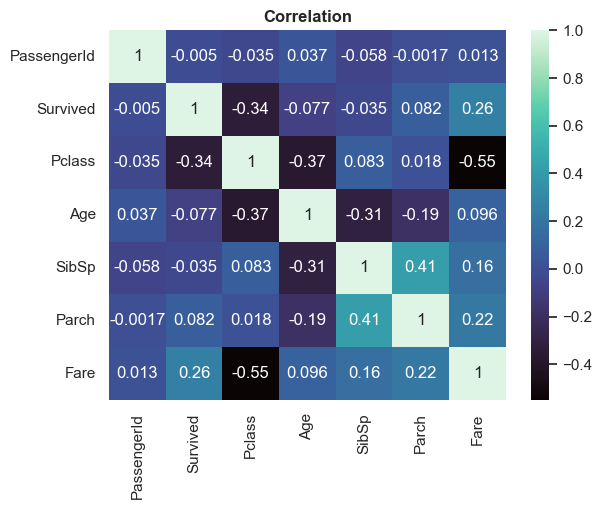

In [5]:
# correlazione
correlation = train_df.corr(numeric_only=True)

# grafico correlazione (heatmap)
heatmap = sns.heatmap(data=correlation, annot=True, cmap='mako').set_title('Correlation', weight='bold')

La correlazione mostra informazioni interessanti:
* La sopravvivenza (`'Survived'`) è particolarmente **correlata negativamente** con la variabile `'Pclass'` (*più alta è la classe di alloggio, minore è la probabilità di sopravvivenza*) e **positivamente** con la variabile `'Fare'` (*maggiore è il prezzo del biglietto, maggiore è la probabilità di sopravvivenza*)
* `'Pclass'` è **correlata negativamente** con `'Age'` (*inferiore è la classe, minore è l'età*) e con `'Fare'` (*inferiore è la classe, minore è il prezzo del biglietto*)
* `'SibSp'` è **correlata positivamente** con `'Parch'` (*se viaggi con fratelli/sorelle o moglie è probabile che viaggerai con i genitori e/o figli*) e `'Fare'` (*maggiore è il numero di parenti a bordo, più alto sarà il prezzo del biglietto*)

### **Variabile `'PassengerId'`**

La variabile **'PassengerId'** rappresenta semplicemente un indice di ordinazione dei passeggeri.

Non sembra esserci correlazione con altre variabili.

### **Variabile `'Pclass'`**

La variabile **'Pclass'** rappresenta la classe di alloggio del passeggero (1°, 2° o 3° classe, rispettivamente dalla migliore alla peggiore).

Questa variabile può essere fonte di diversi spunti per il nostro obiettivo.

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Pclass,,,,,,
1,216,0.242424,136,0.629630,38.233441,84.154687
2,184,0.206510,87,0.472826,29.877630,20.662183
3,491,0.551066,119,0.242363,25.140620,13.675550


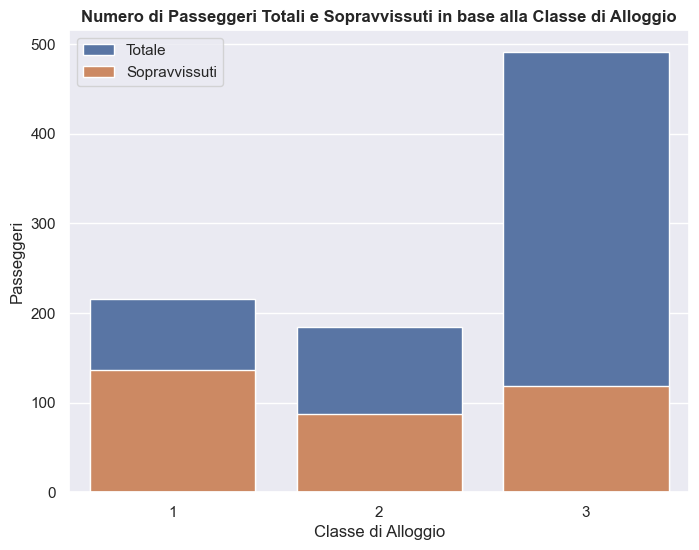

In [6]:
# estrapolo colonna 'Pclass' dal dataset
pclass_train = train_df['Pclass']

# .value_counts() per identificare quanti valori appartengono a ciascuna classe
pclass_value_count = pclass_train.value_counts().sort_index()

# 'Pclass' groupby (sum)
pclass_sum_groupby = train_df.groupby(by=['Pclass']).sum(numeric_only=True)

# 'Pclass' groupby (mean)
pclass_mean_groupby = train_df.groupby(by=['Pclass']).mean(numeric_only=True)

# Trovare il numero di passengeri per classe
pclass_sum_groupby['Passengers'] = pclass_value_count

# Trovare la percentuale di sopravvivenza, età media e prezzo medio per classe
pclass_useful_insights = pclass_sum_groupby.copy(deep=True)
pclass_useful_insights['%_Sopravvivenza'] = pclass_mean_groupby['Survived']
pclass_useful_insights['Età_media'] = pclass_mean_groupby['Age']
pclass_useful_insights['Prezzo_medio'] = pclass_mean_groupby['Fare']
pclass_useful_insights['%_Passengers'] = [x / pclass_value_count.sum() for x in pclass_sum_groupby['Passengers']]
pclass_useful_insights = pclass_useful_insights[['Passengers', '%_Passengers', 'Survived', '%_Sopravvivenza', 'Età_media', 'Prezzo_medio']]
display(pclass_useful_insights)

# grafico per mostrare la distribuzione dei valori

# inizializzare figura
plt.figure(figsize=(8,6))
plt.title('Numero di Passeggeri Totali e Sopravvissuti in base alla Classe di Alloggio', weight='bold')
barplot_total = sns.barplot(data=pclass_sum_groupby, x=pclass_sum_groupby.index, y='Passengers', label='Totale')
barplot_survived = sns.barplot(data=pclass_sum_groupby, x=pclass_sum_groupby.index, y='Survived', label='Sopravvissuti')
plt.legend()
plt.xlabel('Classe di Alloggio')
plt.ylabel('Passeggeri')
plt.show()

### **Variabile `'Name'`**

La variabile `'Name'`, presa a sé stante, non è importante per il nostro obiettivo.

Tuttavia, da essa è possibile estrapolare il **titolo** di ogni persona.

Esso può portare a spunti interessanti per l'analisi

In [7]:
# estrapolo titolo da variabile 'Name'

# primo split utilizzando la virgola
name_split_1 = [x.split(',')[1] for x in train_df['Name']]

# secondo split utilizzando il punto
name_split_2 = [x.split('.')[0] for x in name_split_1]

# elimino lo spazio iniziale
name_split_2_final = [x.replace(' ', '') for x in name_split_2]

# creo nuova colonna 'Name_title'
train_df['Name_title'] = name_split_2_final

# printing value_counts for each title
train_df['Name_title'].value_counts()

Name_title
Mr             517
Miss           182
Mrs            125
Master          40
Dr               7
Rev              6
Mlle             2
Major            2
Col              2
theCountess      1
Capt             1
Ms               1
Sir              1
Lady             1
Mme              1
Don              1
Jonkheer         1
Name: count, dtype: int64

In [8]:
train_df.groupby(by=['Name_title']).mean(numeric_only=True).iloc[:, 1:]

,Survived,Pclass,Age,SibSp,Parch,Fare
Name_title,,,,,,
Capt,0.000000,1.000000,70.000000,1.000000,1.000000,71.000000
Col,0.500000,1.000000,58.000000,0.000000,0.000000,31.025000
Don,0.000000,1.000000,40.000000,0.000000,0.000000,27.720800
Dr,0.428571,1.285714,42.000000,0.571429,0.000000,49.168457
Jonkheer,0.000000,1.000000,38.000000,0.000000,0.000000,0.000000
Lady,1.000000,1.000000,48.000000,1.000000,0.000000,39.600000
Major,0.500000,1.000000,48.500000,0.000000,0.000000,28.525000
Master,0.575000,2.625000,4.574167,2.300000,1.375000,34.703125
Miss,0.697802,2.307692,21.773973,0.714286,0.549451,43.797873


In [9]:
train_df.groupby(by=['Pclass', 'Name_title']).sum(numeric_only=True).iloc[:, 1:]

Survived      Age  SibSp  Parch       Fare
Pclass Name_title                                             
1      Capt                0    70.00      1      1    71.0000
       Col                 1   116.00      0      0    62.0500
       Don                 0    40.00      0      0    27.7208
       Dr                  3   175.00      4      0   319.6792
       Jonkheer            0    38.00      0      0     0.0000
       Lady                1    48.00      1      0    39.6000
       Major               1    97.00      0      0    57.0500
       Master              3    15.92      2      6   353.4083
       Miss               44  1350.00     18     27  5722.5249
       Mlle                2    48.00      0      0   118.8042
       Mme                 1    24.00      0      0    69.3000
       Mr                 37  3617.50     30     27  7279.6792
       Mrs                41  1390.00     33     16  3913.1667
       Sir                 1    49.00      1      0    56.9292
       theCountess         1    33.00      0      0    86.5000
2      Dr                  0    77.00      0      0    24.5000
       Master              9    20.33      8     11   245.7542
       Miss               32   716.50      9     19   693.3875
       Mr                  8  2687.00     28     12  1751.9833
       Mrs                37  1381.00     28     27   963.3417
       Ms                  1    28.00      0      0    13.0000
       Rev                 0   259.00      1      1   109.8750
3      Master             11   128.42     82     38   788.9625
       Miss               51  1112.50    103     54  1555.3004
       Mr                 36  6578.00     91     40  3604.6240
       Mrs                21  1106.00     26     61   765.8082

### **Variabile `'Sex'`**

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Sex,,,,,,
female,314,0.352413,233,0.742038,27.915709,44.479818
male,577,0.647587,109,0.188908,30.726645,25.523893


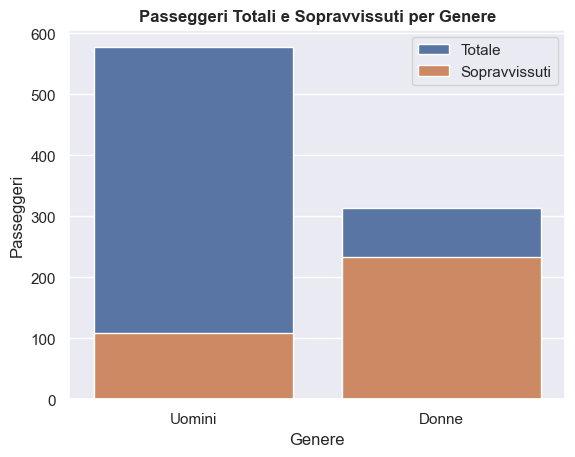

In [10]:
# estrapolo variabile 'sex' dal dataset
sex = train_df['Sex']

# trovo valori per categoria
sex_value_count = sex.value_counts()

# groupby sum
sex_sum_groupby = train_df.groupby(by=['Sex']).sum(numeric_only=True)

# groupby mean
sex_mean_groupby = train_df.groupby(by=['Sex']).mean(numeric_only=True)

# df con informazioni rilevanti
sex_insights_df = sex_sum_groupby.copy(deep=True)
sex_insights_df['%_Sopravvivenza'] = sex_mean_groupby['Survived']
sex_insights_df['Passengers'] = sex_value_count
sex_insights_df['Età_media'] = sex_mean_groupby['Age']
sex_insights_df['Prezzo_medio'] = sex_mean_groupby['Fare']
sex_insights_df['%_Passengers'] = [x / sex_value_count.sum() for x in sex_insights_df['Passengers']]
sex_insights_df = sex_insights_df[['Passengers', '%_Passengers', 'Survived', '%_Sopravvivenza', 'Età_media', 'Prezzo_medio']]
display(sex_insights_df)

# grafico
plt.figure()
plt.title('Passeggeri Totali e Sopravvissuti per Genere', weight='bold')
sns.barplot(sex_value_count, label='Totale')
sns.barplot(sex_sum_groupby['Survived'], label='Sopravvissuti')
plt.legend()
plt.xlabel('Genere')
plt.ylabel('Passeggeri')
plt.xticks(ticks=[0, 1], labels=['Uomini', 'Donne'])
plt.show()

Per usare questa variabili in algoritmi di classificazione è necessario convertirla in formato numerico.

In questo caso il metodo migliore è usare il **One-Hot Encoding**: creare una nuova colonna per ogni valore all'interno della variabile (*in questo caso due: maschio e femmina*) e riempirla di 0, se falso, è 1 se vero.

### **Variabile `'Age'`**

In [11]:
# estrapolo variabile 'Age'
age = train_df['Age']

# vedere quanti nulli ci sono nella variabile
print(f'Nella variabile "Age" ci sono {age.isnull().sum()} nulli')

Nella variabile "Age" ci sono 177 nulli


In [12]:
# trovo età media per ogni titolo (Mr., Mrs., ...)

# groupby title (mean)
title_mean_groupby = train_df.groupby(by=['Name_title']).mean(numeric_only=True)
# estrapolo colonna age dal groupby
mean_age_by_title = title_mean_groupby['Age']


#Funzione che, per ogni titolo all'interno del dataset, sostituisce l'età nulla in base al titolo
for title in list(mean_age_by_title.index):
    train_df.loc[(train_df['Name_title'] == title) & (train_df['Age'].isnull()), 'Age'] = mean_age_by_title[title]


# vedere quanti nulli ci sono nella variabile
print(f'Nella variabile "Age" ci sono {age.isnull().sum()} nulli')

# converto age da float a int
train_df['Age'] = train_df['Age'].astype(int)

# aggiorno variabile estrapolata
age = train_df['Age']

Nella variabile "Age" ci sono 0 nulli


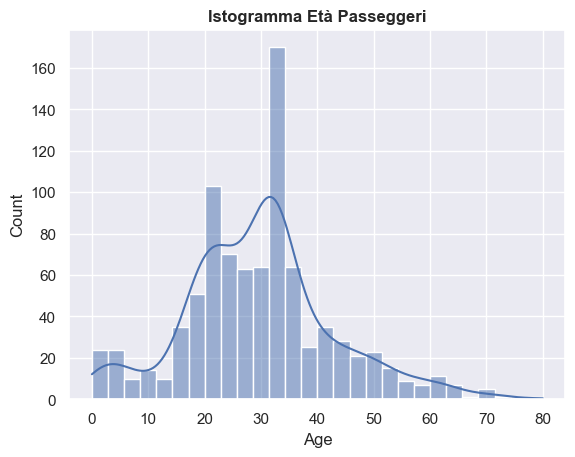

In [13]:
# istogramma variabile 'Age'
sns.histplot(age, kde=True).set_title('Istogramma Età Passeggeri', weight='bold')
plt.show()

In [14]:
# creating array for age ranges
array_list = [x * 10 for x in range(9)]

# list to store the ranges
ages_ranges = []


# for loop that iterates through each element of array_list (besides last one)
for i in range(len(array_list) - 1):
    # identify range(i, i+1)
    start = array_list[i]
    stop = array_list[i + 1]
    # appending range to list
    ages_ranges.append([start, stop])


# for loop that iterates through each age_range
for x in range(len(ages_ranges)):
    age_range = ages_ranges[x]
    # creating column 'age_group' depending on the age range
    train_df.loc[(train_df['Age'].between(left=age_range[0], right=age_range[1])), 'Age_group'] = x


# casting from float to int
train_df['Age_group'] = train_df['Age_group'].astype(int)

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Age_group,,,,,,
0,66,0.074074,40,0.606061,4.000000,30.625188
1,102,0.114478,41,0.401961,16.774510,32.535132
2,256,0.287318,99,0.386719,24.027344,26.317007
3,303,0.340067,101,0.333333,33.211221,32.225011
4,90,0.101010,34,0.377778,44.022222,38.020049
5,48,0.053872,20,0.416667,53.437500,47.933333
6,19,0.021324,6,0.315789,62.421053,48.367542
7,7,0.007856,1,0.142857,72.285714,30.169057


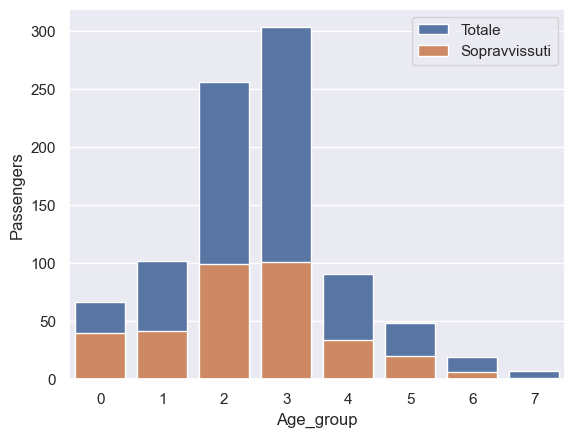

In [15]:
# age group column
age_group = train_df['Age_group']

# age group value counts
age_group_value_counts = age_group.value_counts().sort_index()

# age group sum groupby
age_group_sum_groupby = train_df.groupby(by=['Age_group']).sum(numeric_only=True)

# age group mean groupby
age_group_mean_groupby = train_df.groupby(by=['Age_group']).mean(numeric_only=True)

# creating a copy df to store insights 
age_group_insights_df = age_group_sum_groupby.copy(deep=True)
age_group_insights_df['Passengers'] = age_group_value_counts
age_group_insights_df['%_Passengers'] = [x / sum(age_group_value_counts) for x in age_group_insights_df['Passengers']]
age_group_insights_df['%_Sopravvivenza'] = age_group_mean_groupby['Survived']
age_group_insights_df['Età_media'] = age_group_mean_groupby['Age']
age_group_insights_df['Prezzo_medio'] = age_group_mean_groupby['Fare']
age_group_insights_df = age_group_insights_df[['Passengers', '%_Passengers', 'Survived', '%_Sopravvivenza', 'Età_media', 'Prezzo_medio']]

display(age_group_insights_df)

# plot
sns.barplot(data=age_group_insights_df, x=age_group_insights_df.index, y='Passengers', label='Totale')
sns.barplot(data=age_group_insights_df, x=age_group_insights_df.index, y='Survived', label='Sopravvissuti')
plt.legend()
plt.show()

### **`SibSp` `Parch`**

,Passengers,%_Passengers,Survived,%_Sopravvivenza,Età_media,Prezzo_medio
Family_size,,,,,,
0,537,0.602694,163,0.303538,31.743017,21.242689
1,161,0.180696,89,0.552795,31.397516,49.894129
2,102,0.114478,59,0.578431,25.715686,39.692482
3,29,0.032548,21,0.724138,18.758621,54.864510
4,15,0.016835,3,0.200000,19.733333,58.094453
5,22,0.024691,3,0.136364,18.409091,73.722727
6,12,0.013468,4,0.333333,15.166667,29.366667
7,6,0.006734,0,0.000000,15.666667,46.900000
10,7,0.007856,0,0.000000,23.285714,69.550000


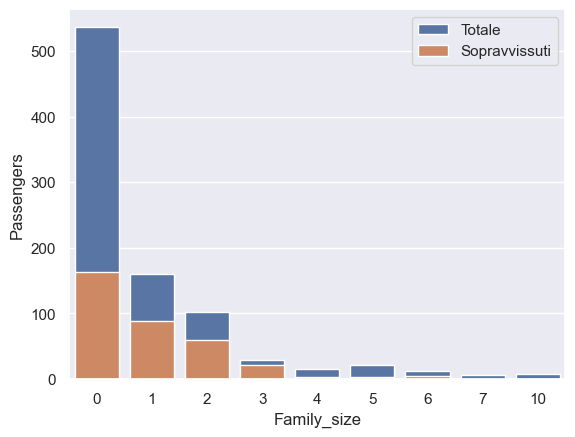

In [16]:
# creating column 'Family_size' (# of siblings + # of parents/children)
train_df['Family_size'] = train_df['SibSp'] + train_df['Parch']

# extract column
family_size = train_df['Family_size']

# value count
family_size_value_count = family_size.value_counts().sort_index()

# family size groupby sum 
family_size_sum_groupby = train_df.groupby(by=['Family_size']).sum(numeric_only=True)

# family size groupby mean
family_size_mean_groupby = train_df.groupby(by=['Family_size']).mean(numeric_only=True)

# useful insights df
family_size_useful_insights = family_size_sum_groupby.copy(deep=True)
family_size_useful_insights['Passengers'] = family_size_value_count
family_size_useful_insights['%_Passengers'] = [x / sum(family_size_value_count) for x in family_size_value_count]
family_size_useful_insights['%_Sopravvivenza'] = family_size_mean_groupby['Survived']
family_size_useful_insights['Età_media'] = family_size_mean_groupby['Age']
family_size_useful_insights['Prezzo_medio'] = family_size_mean_groupby['Fare']
family_size_useful_insights = family_size_useful_insights[['Passengers', '%_Passengers', 'Survived', '%_Sopravvivenza', 'Età_media', 'Prezzo_medio']]

display(family_size_useful_insights)

# plot
sns.barplot(data=family_size_useful_insights, x=family_size_useful_insights.index, y='Passengers', label='Totale')
sns.barplot(data=family_size_useful_insights, x=family_size_useful_insights.index, y='Survived', label='Sopravvissuti')
plt.legend()
plt.show()

### **`Ticket`**

### **`Fare`**

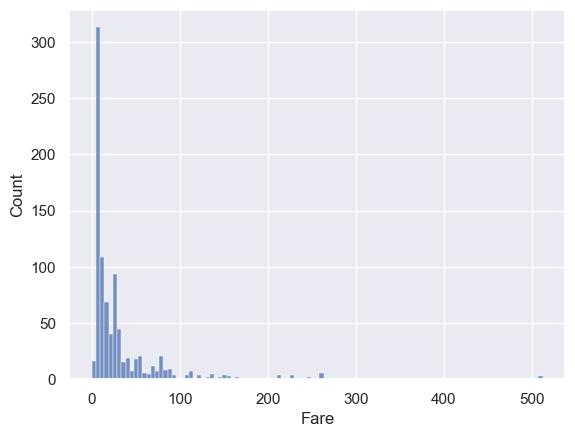

In [17]:
prezzo = train_df['Fare']

sns.histplot(prezzo)
plt.show()

### **`Cabin`**

In [18]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_title   891 non-null    object 
 13  Age_group    891 non-null    int32  
 14  Family_size  891 non-null    int64  
dtypes: float64(1), int32(2), int64(6), object(6)
memory usage: 97.6+ KB


In [19]:
ticket_value_counts = train_df['Ticket'].value_counts()

tickets_more_than_one = ticket_value_counts[train_df['Ticket'].value_counts() > 1]

tickets_dictionary = {}


for ticket in tickets_more_than_one.index:
    cabin_series = list(train_df.loc[train_df['Ticket'] == ticket, 'Cabin'].values)
    tickets_dictionary[ticket] = cabin_series


for ticket in tickets_dictionary:
    tickets_dictionary[ticket] = [x for x in tickets_dictionary[ticket] if not pd.isna(x)]
    tickets_dictionary = {k: v for k, v in tickets_dictionary.items() if v}
    

for ticket in tickets_dictionary:
    train_df.loc[(train_df['Ticket'] == ticket) & (train_df['Cabin'].isnull()), 'Cabin'] = tickets_dictionary[ticket][0]
    

train_df.loc[(train_df['Pclass'] == 3) & (train_df['Cabin'].isnull()), 'Cabin'] = 'Z'
train_df.loc[(train_df['Pclass'] == 2) & (train_df['Cabin'].isnull()), 'Cabin'] = 'Y'
train_df.loc[(train_df['Pclass'] == 1) & (train_df['Cabin'].isnull()), 'Cabin'] = 'X'

In [21]:
cabin = train_df['Cabin']

str_cabin = [list(x) for x in cabin]

train_df['Cabin_deck'] = [x[0] for x in str_cabin]

train_df 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Name_title,Age_group,Family_size,Cabin_deck
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,Z,S,Mr,2,1,Z
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C,Mrs,3,1,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,Z,S,Miss,2,0,Z
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S,Mrs,3,1,C
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,Z,S,Mr,3,0,Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27,0,0,211536,13.0000,Y,S,Rev,2,0,Y
887,888,1,1,"Graham, Miss. Margaret Edith",female,19,0,0,112053,30.0000,B42,S,Miss,1,0,B
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,21,1,2,W./C. 6607,23.4500,Z,S,Miss,2,3,Z
889,890,1,1,"Behr, Mr. Karl Howell",male,26,0,0,111369,30.0000,C148,C,Mr,2,0,C


In [22]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    int32  
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     889 non-null    object 
 12  Name_title   891 non-null    object 
 13  Age_group    891 non-null    int32  
 14  Family_size  891 non-null    int64  
 15  Cabin_deck   891 non-null    object 
dtypes: float64(1), int32(2), int64(6), object(7)
memory usage: 104.5+ KB


## **Machine Learning**